# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [3]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [5]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [6]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.set_index('Unnamed: 0', inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
Unnamed: 0,,,,,,,,,,
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.name='hero_names'

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [9]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


In [10]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

**Strategy:** Find missing values by summing NA per column and also looking for obviously nonsensical measurements. Determine the quantity of these missing values compared to the total. If it is a high number then drop the column, else replace it with a missing place holder or determine if those rows are missing much of the data and then drop those rows. Look for placeholder values for missing values in the categorical data and repeat the process above to determine whether to drop it or not.


In [55]:
heroes_df.isna().sum()

Unnamed: 0    False
Gender        False
Eye color     False
Height        False
Publisher     False
Alignment     False
Weight        False
dtype: bool

In [12]:
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [13]:
len(heroes_df['Publisher'])

734

In [5]:
heroes_df[heroes_df['Publisher'].isna()]='-'

In [9]:
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', '-', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien',
       'brown'], dtype=object)

In [14]:
heroes_df['Weight'].unique()

array([441.,  65.,  90., -99., 122.,  88.,  61.,  81., 104., 108.,  72.,
       169., 173., 101.,  68.,  57.,  54.,  83.,  86., 358., 135., 106.,
       146.,  63.,  98., 270.,  59.,  50., 126.,  67., 180.,  77.,  52.,
        95.,  79., 133., 181., 216.,  71., 124., 155., 113.,  58.,  92.,
        97.,  56., 230., 495.,  55., 110.,  99., 158.,  74., 116.,  62.,
       170.,  70.,  78., 225., 817.,  27.,  91., 178., 383., 171., 187.,
       132.,  89., 412., 306.,  80., 203.,  96.,  18.,  45., 167.,  16.,
       630., 268.,  nan, 115.,   4.,  48., 119., 207., 191.,   2.,  14.,
        49., 855., 356., 324., 360., 288., 236.,  36., 140., 128., 338.,
       248., 125.,  85., 293.,  69., 405., 117.,  87., 234., 320.,  38.,
        25., 900., 310., 149., 315., 153., 437., 131.,  47., 176., 198.,
       443., 143.,  76.,  82., 105., 331., 214.,  73., 334.,  41., 162.,
        39., 473.,  51.,  17.])

In [19]:
heroes_df['name'].value_counts()

Spider-Man           3
Goliath              3
Namor                2
Nova                 2
Blizzard             2
Blue Beetle          2
Vindicator           2
Angel                2
Toxin                2
Black Canary         2
Batman               2
Speedy               2
Atlas                2
Atom                 2
Firestorm            2
Batgirl              2
Captain Marvel       2
Invisible Woman      1
Captain Hindsight    1
Jim Powell           1
Green Goblin II      1
Man-Wolf             1
Stormtrooper         1
Black Widow          1
Doctor Strange       1
Booster Gold         1
Jean Grey            1
Cheetah II           1
Osiris               1
Peter Petrelli       1
                    ..
Carnage              1
Gorilla Grodd        1
Steppenwolf          1
Cheetah              1
Scarlet Witch        1
Riddler              1
Captain Mar-vell     1
Wolverine            1
Falcon               1
Static               1
John Stewart         1
Ariel                1
Thing      

In [21]:
heroes_df['Gender'].value_counts()

Male      505
Female    200
-          29
Name: Gender, dtype: int64

In [7]:
heroes_df[heroes_df['Gender']=='-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
Unnamed: 0,,,,,,,,,,
46,-,-,-,-,-,-,-,-,-,-
86,-,-,-,-,-,-,-,-,-,-
87,Bird-Brain,-,-,-,-,-99,Marvel Comics,-,good,-99
112,Blaquesmith,-,black,-,No Hair,-99,Marvel Comics,-,good,-99
133,Box III,-,blue,-,Blond,193,Marvel Comics,-,good,110
134,Box IV,-,brown,-,Brown / Black,-99,Marvel Comics,-,good,-99
138,-,-,-,-,-,-,-,-,-,-
160,Captain Universe,-,-,God / Eternal,-,-99,Marvel Comics,-,good,-99
165,Cecilia Reyes,-,brown,-,Brown,170,Marvel Comics,-,good,62


In [23]:
heroes_df['Eye color'].value_counts()

blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
yellow (without irises)      2
amber                        2
violet                       2
yellow / blue                1
white / red                  1
yellow / red                 1
silver                       1
blue / white                 1
green / blue                 1
indigo                       1
bown                         1
Name: Eye color, dtype: int64

In [8]:
heroes_df[heroes_df['Eye color']=='-']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
Unnamed: 0,,,,,,,,,,
10,Agent Zero,Male,-,-,-,191,Marvel Comics,-,good,104
14,Alex Mercer,Male,-,Human,-,-99,Wildstorm,-,bad,-99
15,Alex Woolsly,Male,-,-,-,-99,NBC - Heroes,-,good,-99
17,Alien,Male,-,Xenomorph XX121,No Hair,244,Dark Horse Comics,black,bad,169
18,Allan Quatermain,Male,-,-,-,-99,Wildstorm,-,good,-99
21,Ando Masahashi,Male,-,-,-,-99,NBC - Heroes,-,good,-99
23,Angel,Male,-,Vampire,-,-99,Dark Horse Comics,-,good,-99
26,Angela,Female,-,-,-,-99,Image Comics,-,bad,-99
32,Anti-Spawn,Male,-,-,-,-99,Image Comics,-,bad,-99


In [9]:
heroes_df[heroes_df['Eye color']=='bown']='brown'

In [28]:
heroes_df['Race'].value_counts()

-                     304
Human                 207
Mutant                 63
God / Eternal          14
Human / Radiation      11
Cyborg                 11
Symbiote                9
Android                 9
Kryptonian              7
Alien                   7
Demon                   6
Alpha                   5
Atlantean               5
Asgardian               5
Animal                  4
Cosmic Entity           4
Inhuman                 4
Human / Altered         3
New God                 3
Frost Giant             2
Demi-God                2
Human / Cosmic          2
Metahuman               2
Eternal                 2
Amazon                  2
Human-Kree              2
Saiyan                  2
Vampire                 2
Planet                  1
Strontian               1
                     ... 
brown                   1
Human-Spartoi           1
Martian                 1
Kakarantharaian         1
Neyaphem                1
Human / Clone           1
Luphomoid               1
Human-Vulcan

In [10]:
heroes_df=heroes_df.drop('Race',axis=1)

In [30]:
heroes_df['Hair color'].value_counts()

-                   172
Black               157
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Grey                  5
Purple                5
Brown / White         4
Silver                4
blond                 3
Blue                  3
black                 3
Yellow                2
Orange                2
Brownn                1
Orange / White        1
Red / Orange          1
Black / Blue          1
Pink                  1
Brown / Black         1
Magenta               1
Red / Grey            1
brown                 1
Indigo                1
Gold                  1
Red / White           1
Name: Hair color, dtype: int64

In [11]:
heroes_df=heroes_df.drop('Hair color',axis=1)

In [11]:
heroes_df['Skin color'].value_counts()

-                 663
green              21
blue                9
red                 8
white               7
silver              5
grey                4
purple              3
gold                3
pink                2
yellow              2
black               1
red / black         1
gray                1
brown               1
orange              1
orange / white      1
blue-white          1
Name: Skin color, dtype: int64

In [12]:
heroes_df.drop('Skin color',axis=1,inplace=True)

In [13]:
heroes_df['Alignment'].value_counts()

good       483
bad        205
neutral     24
-           21
brown        1
Name: Alignment, dtype: int64

In [13]:
powers_df.isna().sum().sum()

0

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [13]:
powers_df.rename(columns={'hero_names':'name'},inplace=True)

In [25]:
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
powers_df.set_index('name',inplace=True)

In [29]:
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
heroes_df.set_index('name', inplace=True)

In [31]:
heroes_df.head()

,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,
A-Bomb,Male,yellow,No Hair,203,Marvel Comics,good,441
Abe Sapien,Male,blue,No Hair,191,Dark Horse Comics,good,65
Abin Sur,Male,blue,No Hair,185,DC Comics,good,90
Abomination,Male,green,No Hair,203,Marvel Comics,bad,441
Abraxas,Male,blue,Black,-99,Marvel Comics,bad,-99


In [16]:
df=heroes_df.join(powers_df,on='name',rsuffix='_powers')

In [36]:
df.head()

,Gender,Eye color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,203,Marvel Comics,good,441,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,191,Dark Horse Comics,good,65,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,185,DC Comics,good,90,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,203,Marvel Comics,bad,441,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,-99,Marvel Comics,bad,-99,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [17]:
female_df=df[df['Gender']=='Female']

In [38]:
female_df.head()

,Gender,Eye color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
Agent 13,Female,blue,173,Marvel Comics,good,61,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angel Dust,Female,yellow,165,Marvel Comics,good,57,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angel Salvadore,Female,brown,163,Marvel Comics,good,54,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angela,Female,-,-99,Image Comics,bad,-99,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arachne,Female,blue,175,Marvel Comics,good,63,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [18]:
male_df=df[df['Gender']=='Male']
male_df.head()

,Gender,Eye color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,203,Marvel Comics,good,441,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,191,Dark Horse Comics,good,65,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,185,DC Comics,good,90,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,203,Marvel Comics,bad,441,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,-99,Marvel Comics,bad,-99,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [59]:
male_df.Height.value_counts()

-99.0     140
 183.0     53
 188.0     48
 185.0     33
 178.0     24
 180.0     24
 191.0     19
 175.0     17
 198.0     17
 193.0     16
 201.0     10
 196.0     10
 170.0      7
 213.0      6
 173.0      5
 203.0      5
 165.0      5
 168.0      4
 211.0      4
 244.0      4
 226.0      3
 229.0      3
 157.0      3
 155.0      2
 305.0      2
 163.0      2
 279.0      2
 122.0      2
 206.0      2
 701.0      1
 30.5       1
 259.0      1
 137.0      1
 267.0      1
 142.0      1
 15.2       1
 366.0      1
 876.0      1
 234.0      1
 287.0      1
 64.0       1
 160.0      1
 218.0      1
 975.0      1
 79.0       1
 61.0       1
 71.0       1
 66.0       1
 304.8      1
 257.0      1
Name: Height, dtype: int64

In [60]:
len(male_df)

493

In [56]:
male_df.Height.unique()

array([203.0, 191.0, 185.0, -99.0, 193.0, 178.0, 188.0, 180.0, 244.0,
       257.0, 183.0, 211.0, 61.0, 229.0, 213.0, 198.0, 165.0, 175.0,
       173.0, 201.0, 30.5, 196.0, 170.0, 226.0, 267.0, 122.0, 975.0,
       157.0, 142.0, 876.0, 701.0, 259.0, 79.0, 155.0, 71.0, 287.0, 234.0,
       64.0, 168.0, 366.0, 206.0, 305.0, 163.0, 137.0, 279.0, 15.2, 218.0,
       160.0, 304.8, 66.0], dtype=object)

In [45]:
male_df.Weight.value_counts()

90.0     174
79.0      23
81.0      19
86.0      15
101.0     11
88.0      11
77.0      11
95.0      10
83.0       8
74.0       7
97.0       7
104.0      7
63.0       6
117.0      6
108.0      6
99.0       6
68.0       6
135.0      6
65.0       5
158.0      4
70.0       4
203.0      4
146.0      4
113.0      4
72.0       4
56.0       4
171.0      3
191.0      3
106.0      3
54.0       3
        ... 
383.0      1
293.0      1
437.0      1
443.0      1
320.0      1
234.0      1
69.0       1
125.0      1
412.0      1
331.0      1
52.0       1
45.0       1
16.0       1
268.0      1
62.0       1
4.0        1
119.0      1
207.0      1
2.0        1
14.0       1
356.0      1
324.0      1
59.0       1
236.0      1
36.0       1
140.0      1
128.0      1
338.0      1
248.0      1
306.0      1
Name: Weight, Length: 114, dtype: int64

In [62]:
len(female_df)

198

In [44]:
female_df.Weight.value_counts()

58.0     60
54.0     20
52.0     14
59.0     13
61.0     11
50.0     10
56.0      9
57.0      7
63.0      5
55.0      5
65.0      4
72.0      4
74.0      3
49.0      2
81.0      2
104.0     1
67.0      1
68.0      1
495.0     1
77.0      1
135.0     1
98.0      1
167.0     1
51.0      1
630.0     1
473.0     1
41.0      1
214.0     1
105.0     1
158.0     1
143.0     1
149.0     1
62.0      1
71.0      1
191.0     1
153.0     1
315.0     1
70.0      1
83.0      1
101.0     1
85.0      1
48.0      1
225.0     1
115.0     1
Name: Weight, dtype: int64

In [61]:
female_df.Height.value_counts()

-99.0     54
 168.0    24
 165.0    21
 170.0    18
 175.0    15
 180.0    14
 178.0    12
 173.0    12
 163.0     6
 183.0     4
 193.0     2
 157.0     2
 218.0     2
 188.0     2
 211.0     1
 62.5      1
 213.0     1
 366.0     1
 201.0     1
 185.0     1
 297.0     1
 155.0     1
 137.0     1
 191.0     1
Name: Height, dtype: int64

In [19]:
male_df['Weight'].replace(-99.0,male_df[male_df['Weight']>0]['Weight'].median(),inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
female_df['Weight'].replace(-99.0,female_df[female_df['Weight']>0]['Weight'].median(),inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
male_df['Height'].replace(-99.0,male_df[male_df['Height']>0]['Height'].median(),inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
female_df['Height'].replace(-99.0,female_df[female_df['Height']>0]['Height'].median(),inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
female_df[female_df['Weight']>0]['Weight'].median()

58.0

<Figure size 432x288 with 0 Axes>

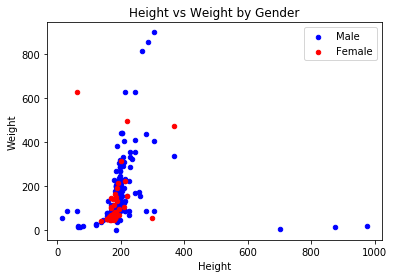

In [50]:
fig = plt.figure()
ax=male_df.plot.scatter(x='Height',y='Weight',c='blue')
female_df.plot(x='Height',y='Weight',kind='scatter',color='red',ax=ax)
plt.title('Height vs Weight by Gender')
plt.legend(['Male','Female'])


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [24]:
def show_distplot(dataframe, gender, column_name):
    return sns.distplot(dataframe[dataframe.Gender==gender][column_name])

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


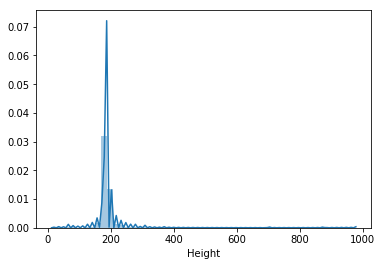

In [74]:
# Male Height
show_distplot(male_df,'Male','Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


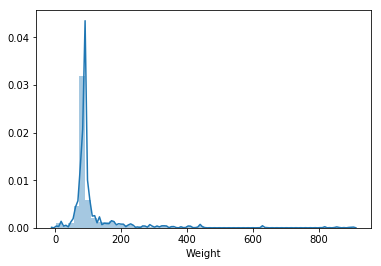

In [75]:
# Male Weight
show_distplot(male_df,'Male','Weight');

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


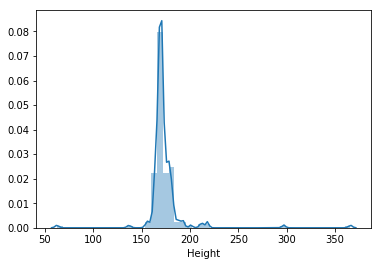

In [76]:
# Female Height
show_distplot(female_df,'Female','Height');

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


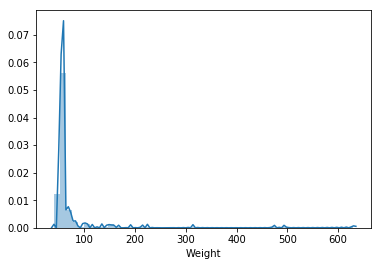

In [77]:
# Female Weight
show_distplot(female_df,'Female','Weight');

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

**Answer:** Both female and male heights tended to be normally distributed and their weights positively skewed. Male means tended to be higher in each category than the corresponding female values. The process of replacing missing values with the median resulted in pronounced peaks at the center.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [28]:
powers_df.groupby(powers_df.columns,axis=1).sum().sum().sort_values(ascending=False).head()

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [41]:
df[df['Publisher']=='Marvel Comics'].iloc[:,7:].sum().sort_values(ascending=False).head()

Super Strength    204.0
Durability        154.0
Stamina           150.0
Super Speed       137.0
Flight            111.0
dtype: float64

In [42]:
df[df['Publisher']=='DC Comics'].iloc[:,7:].sum().sort_values(ascending=False).head()

Super Strength    108.0
Stamina            89.0
Flight             85.0
Super Speed        78.0
Durability         71.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
**Answer:** The top 5 powers across the Marvel and DC universe are almost identical: the top 5 are both Super Strength, Stamina, Flight, Durability and Super Speed. Their distribution is slightly different except for Super Strength taking the top spot for both. They differ only slightly from the overall trend which includes Agility in place of Flight.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
**Question:** I picked which powers have the highest chance of co-occuring in a hero and to look at how gender effects this. To look into this question I will find the correlation between the different power features and find the top 5 grouped by gender.


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [29]:
pd.DataFrame(df.iloc[:,7:].replace(True,1).replace(False,0).corr().replace(1,0)).max().sort_values(ascending=False).head(11)

Intuitive aptitude      0.706558
Melting                 0.706558
Vision - Microscopic    0.677593
Vision - X-Ray          0.677593
Omniscient              0.630981
Omnipotent              0.630981
Omnipresent             0.630981
Vision - Heat           0.630092
Wallcrawling            0.621850
Web Creation            0.621850
Time Travel             0.618203
dtype: float64

From the above it is clear that the top correlated powers overall are:
    * intuitive aptitude and melting
    * microscopic vision and x-ray vision
    * omniscience, omnipotence and omnipresence

In [30]:
pd.DataFrame(male_df.iloc[:,7:].replace(True,1).replace(False,0).corr().replace(1,0)).max().sort_values(ascending=False).head(11)

Projection              0.706324
Power Sense             0.706324
Intuitive aptitude      0.706324
Melting                 0.706324
Molecular Combustion    0.706324
Vitakinesis             0.706324
Vision - X-Ray          0.689592
Vision - Microscopic    0.689592
Symbiote Costume        0.659560
Web Creation            0.659560
Vision - Heat           0.638276
dtype: float64

From the above it is clear that the top correlated male powers are:
    * projection, power sense, intuitive aptitude, melting, molecular combustion and vitakinesis

In [31]:
pd.DataFrame(female_df.iloc[:,7:].replace(True,1).replace(False,0).corr().replace(1,0)).max().sort_values(ascending=False).head(11)

Vision - Thermal        0.827451
Vision - Infrared       0.827451
Vision - Telescopic     0.765430
Vision - Microscopic    0.765430
Resurrection            0.705084
Phoenix Force           0.705084
Power Sense             0.705084
Power Augmentation      0.705084
Weather Control         0.705084
Terrakinesis            0.705084
Underwater breathing    0.703031
dtype: float64

From the above it is clear that the top correlated female powers are:
    * thermal vision and infrared vision
    * telescopic vision and microscopic vision

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data